<a href="https://colab.research.google.com/github/chhanish/Property-price-prediction/blob/main/File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Property Price prediction

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
df1=pd.read_csv('/content/Bengaluru_House_Data.csv')

In [245]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [246]:
df1.shape

(13320, 9)

##Data Manipulation

In [247]:
df1.groupby('area_type')['area_type'].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [248]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')

In [249]:
df2.shape

(13320, 5)

In [250]:
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [251]:
df2['total_sqft']=df2['total_sqft'].astype(int)

ValueError: invalid literal for int() with base 10: '2100 - 2850'

In [ ]:
total_sqft_median=df2['total_sqft'].median()
df2=df2['total_sqft'].fillna(total_sqft_median)

In [252]:
df3=df2.dropna()

In [253]:
df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


##Feature Engineering

In [254]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-254-c379116b8702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [255]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [256]:
def is_float(x):
  try:
    float(x)
  except:
      return False
  return True

In [257]:
df3[~df3['total_sqft'].apply(is_float)].count()

,0
location,190
size,190
total_sqft,190
bath,190
price,190
bhk,190


In [258]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [259]:
def convt_sqft(x):
  token= x.split('-')
  if len(token)==2:
    return float(token[0])+float(token[1])/2
    try:
      return float(x)
    except:
      return None


In [260]:
df3['total_sqft']=df3['total_sqft'].apply(convt_sqft)

<ipython-input-260-a37519b22d12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft']=df3['total_sqft'].apply(convt_sqft)


In [261]:
df3['total_sqft'].unique()

array([     nan, 3525.   , 7145.   , 1594.5  , 1815.   , 1785.   ,
       1915.   , 1692.5  , 5591.   , 1757.5  , 1680.   ,  842.5  ,
       1642.5  ,  982.5  ,  966.   , 2172.5  , 1442.   , 1396.5  ,
        960.995,  905.   , 5142.5  , 2940.5  , 5530.   , 6624.5  ,
       1902.5  , 1160.   , 1631.275, 1606.   , 1113.   , 4390.   ,
       4271.   ,  998.   , 2186.5  , 2002.5  , 1652.5  , 1495.   ,
       4305.905, 1727.5  , 4315.5  ,  937.   , 1069.   , 1948.5  ,
       5101.   , 1875.   , 1675.5  ,  648.5  ,  971.   ,  875.   ,
       4350.   , 1533.   , 1010.   ,  605.   , 1190.5  , 2352.   ,
       1930.   , 1410.   , 3875.5  , 3929.5  ,  917.   , 3011.   ,
       4967.5  , 1995.   , 2215.   , 1605.5  , 2362.5  , 1907.5  ,
       1345.   , 1026.   , 2135.5  , 1500.5  , 1077.   , 1660.   ,
       2425.   , 1165.5  , 5039.   , 1087.   , 3695.5  ,  910.   ,
       5608.5  , 7370.   , 1140.   , 1025.   , 1026.5  , 1107.5  ,
        822.5  , 1150.   , 2562.5  , 1670.5  , 4235.   , 1553.

In [262]:
df3.isnull().sum()

,0
location,0
size,0
total_sqft,13102
bath,0
price,0
bhk,0


In [263]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,NaN,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,NaN,5.0,120.00,4
2,Uttarahalli,3 BHK,NaN,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,NaN,3.0,95.00,3
4,Kothanur,2 BHK,NaN,2.0,51.00,2


In [264]:
df3.shape

(13246, 6)

In [265]:
df5=df3.copy()

In [266]:
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,NaN,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,NaN,5.0,120.00,4
2,Uttarahalli,3 BHK,NaN,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,NaN,3.0,95.00,3
4,Kothanur,2 BHK,NaN,2.0,51.00,2


In [267]:
df5['total_sqft'].unique()

array([     nan, 3525.   , 7145.   , 1594.5  , 1815.   , 1785.   ,
       1915.   , 1692.5  , 5591.   , 1757.5  , 1680.   ,  842.5  ,
       1642.5  ,  982.5  ,  966.   , 2172.5  , 1442.   , 1396.5  ,
        960.995,  905.   , 5142.5  , 2940.5  , 5530.   , 6624.5  ,
       1902.5  , 1160.   , 1631.275, 1606.   , 1113.   , 4390.   ,
       4271.   ,  998.   , 2186.5  , 2002.5  , 1652.5  , 1495.   ,
       4305.905, 1727.5  , 4315.5  ,  937.   , 1069.   , 1948.5  ,
       5101.   , 1875.   , 1675.5  ,  648.5  ,  971.   ,  875.   ,
       4350.   , 1533.   , 1010.   ,  605.   , 1190.5  , 2352.   ,
       1930.   , 1410.   , 3875.5  , 3929.5  ,  917.   , 3011.   ,
       4967.5  , 1995.   , 2215.   , 1605.5  , 2362.5  , 1907.5  ,
       1345.   , 1026.   , 2135.5  , 1500.5  , 1077.   , 1660.   ,
       2425.   , 1165.5  , 5039.   , 1087.   , 3695.5  ,  910.   ,
       5608.5  , 7370.   , 1140.   , 1025.   , 1026.5  , 1107.5  ,
        822.5  , 1150.   , 2562.5  , 1670.5  , 4235.   , 1553.

In [268]:
df5.shape

(13246, 6)

In [269]:
df5.isnull().sum()

,0
location,0
size,0
total_sqft,13102
bath,0
price,0
bhk,0


In [270]:
df5.shape

(13246, 6)

In [271]:
# Calculate the average total_sqft for each bhk group
avg_sqft_by_bhk = df5.groupby('bhk')['total_sqft'].transform('mean')

# Replace NaN values in total_sqft with the average total_sqft for the same bhk
df5['total_sqft'] = df5['total_sqft'].fillna(avg_sqft_by_bhk)


In [272]:
df5.isnull().sum()

,0
location,0
size,0
total_sqft,490
bath,0
price,0
bhk,0


In [273]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

In [274]:
df5.isnull().sum()

,0
location,0
size,0
total_sqft,490
bath,0
price,0
bhk,0
price_per_sqft,490


In [275]:
df5.dropna(subset=['total_sqft'], axis=0, inplace=True)

In [276]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1649.397614,2.0,39.07,2,2368.743575
1,Chikka Tirupathi,4 Bedroom,4798.211571,5.0,120.00,4,2500.931820
2,Uttarahalli,3 BHK,2279.469792,2.0,62.00,3,2719.930759
3,Lingadheeranahalli,3 BHK,2279.469792,3.0,95.00,3,4167.635840
4,Kothanur,2 BHK,1649.397614,2.0,51.00,2,3092.037940


In [277]:
df5.shape

(12756, 7)

In [278]:
len(df5.location.unique())

1243

In [279]:
df5.location=df5.location.apply(lambda x: x.strip())

In [280]:
location_stats=df5.location.groupby(df5.location).count().sort_values(ascending=False)

In [281]:
location_stats

,location
location,
Whitefield,534
Sarjapur Road,392
Electronic City,303
Kanakpura Road,266
Thanisandra,233
...,...
Kannur,1
Karnataka Shabarimala,1
Kathreguppe,1


In [282]:
location_stats_less_than_10=location_stats[location_stats<10]

In [283]:
location_stats_less_than_10.shape

(988,)

In [284]:
df5.location=df5.location.apply(lambda x: x if x not in location_stats_less_than_10 else 'other')

In [285]:
len(df5.location.unique())

245

In [286]:
df5.shape

(12756, 7)

##Oultlier Detection and Removal


In [287]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft


##Removing outliers based of standard deviaitons

In [288]:

df5.price_per_sqft.describe()

,price_per_sqft
count,12756.000000
mean,4360.465871
std,3599.298656
min,438.698509
25%,2632.191057
50%,3509.588076
75%,4850.255593
max,87739.701895


## upon above observaiton we see that the min value is too low and max value is too high. Therefore filtering out data points which are one 1 SD away

In [289]:
def remove_outliers(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    sd=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-sd))&(subdf.price_per_sqft<=(m+sd))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out
df7=remove_outliers(df5)
df7.shape


(10428, 7)

In [290]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,4798.211571,4.0,428.0,4,8919.990159
1,1st Block Jayanagar,3 BHK,2279.469792,3.0,194.0,3,8510.751084
2,1st Block Jayanagar,4 Bedroom,4798.211571,4.0,450.0,4,9378.494327
3,1st Block Jayanagar,3 BHK,2279.469792,2.0,130.0,3,5703.080623
4,1st Block Jayanagar,2 BHK,1649.397614,2.0,148.0,2,8972.972846


In [291]:
df7.bhk.unique()

array([4, 3, 2, 1, 5])

In [292]:
import matplotlib.pyplot as plt

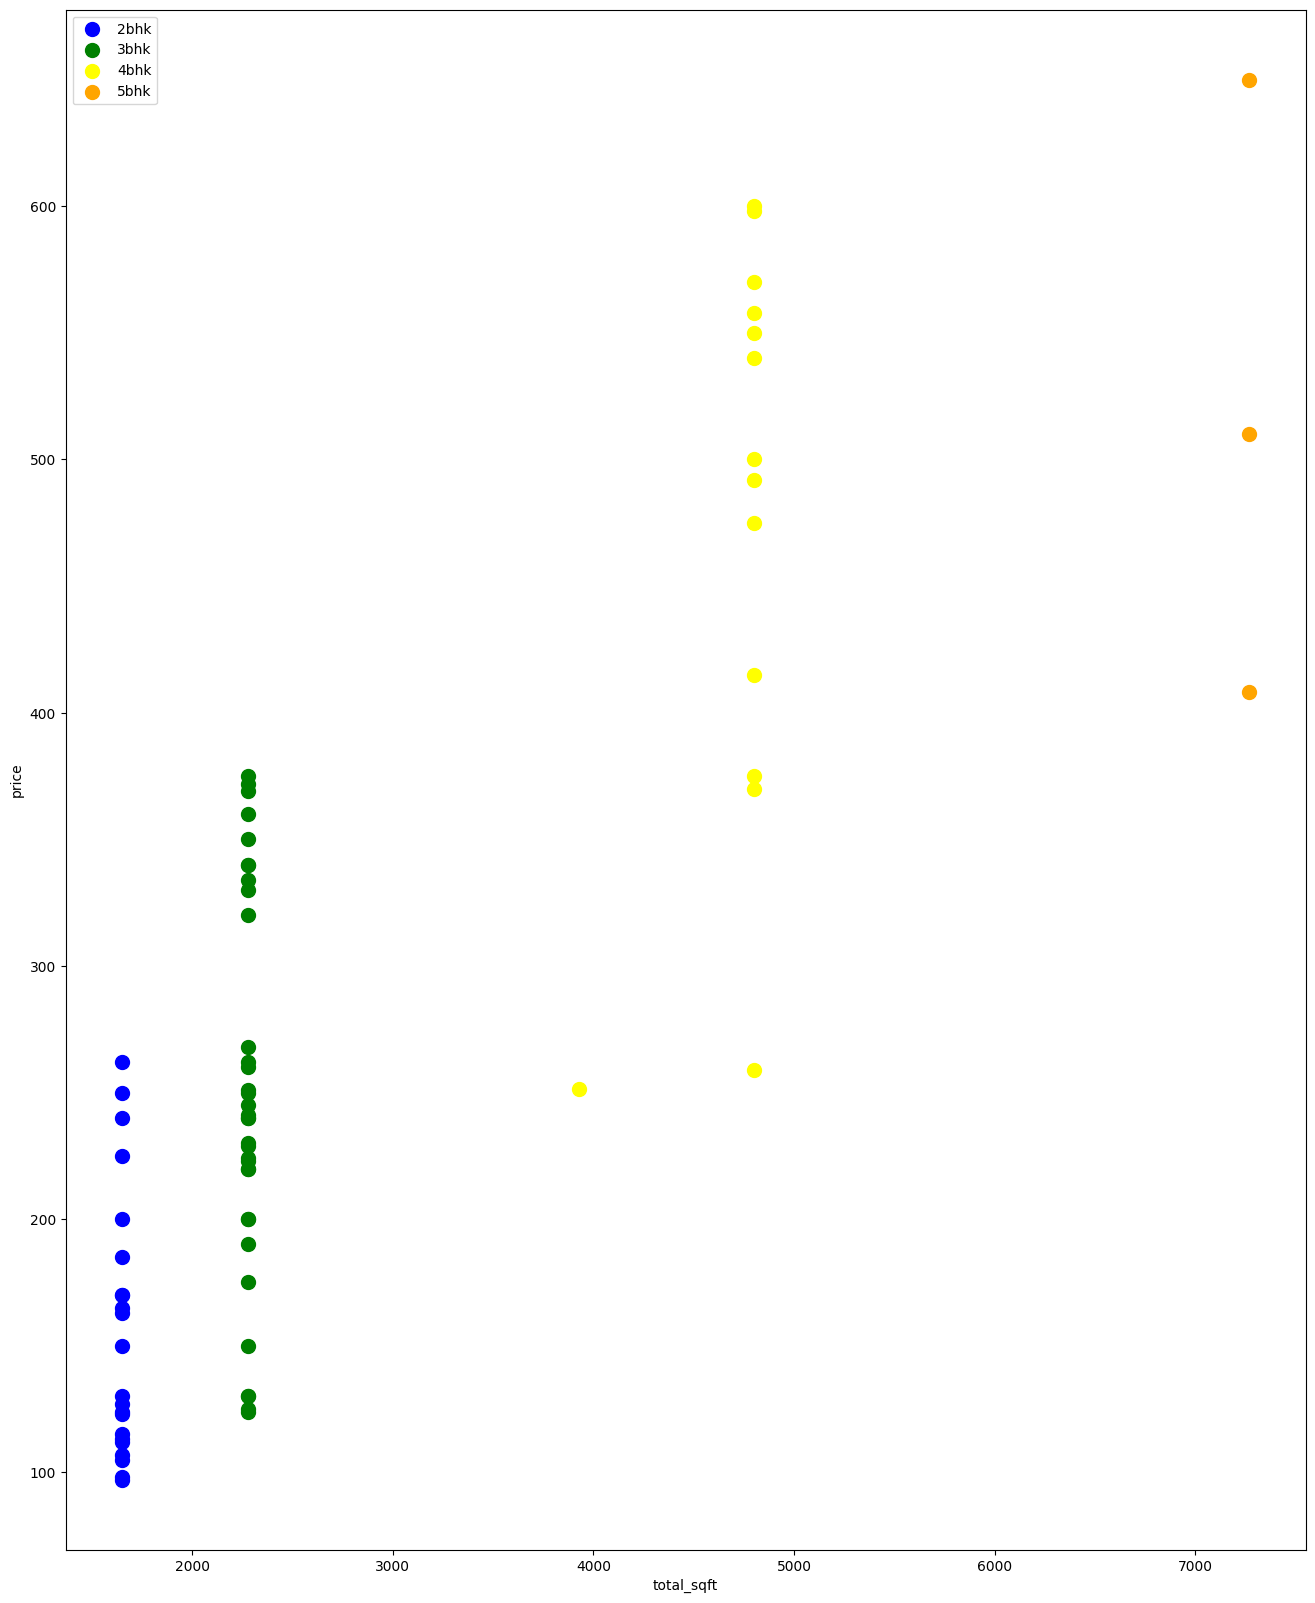

In [293]:
def bhk_scatter_plot(df,location):
    bhk2= df[(df.location==location)&(df.bhk==2)]
    bhk3= df[(df.location==location)&(df.bhk==3)]
    bhk4= df[(df.location==location)&(df.bhk==4)]
    bhk5=df[(df.location==location)&(df.bhk==5)]
    plt.figure(figsize=(16,20))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2bhk',s=100)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3bhk',s=100)
    plt.scatter(bhk4.total_sqft,bhk4.price,color='yellow',label='4bhk',s=100)
    plt.scatter(bhk5.total_sqft,bhk5.price,color='orange',label='5bhk',s=100)
    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.legend()


bhk_scatter_plot(df7,'Rajaji Nagar')

## Removing the 2 bhk apartments whose price _per_sqft is less then mean_proce_sqft of 1 BHK

In [294]:
def remove_bhk_outlier(df):
  exclude_indices=np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]= {
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

df8=remove_bhk_outlier(df7)
df8.shape

(7060, 7)

Text(0, 0.5, 'count')

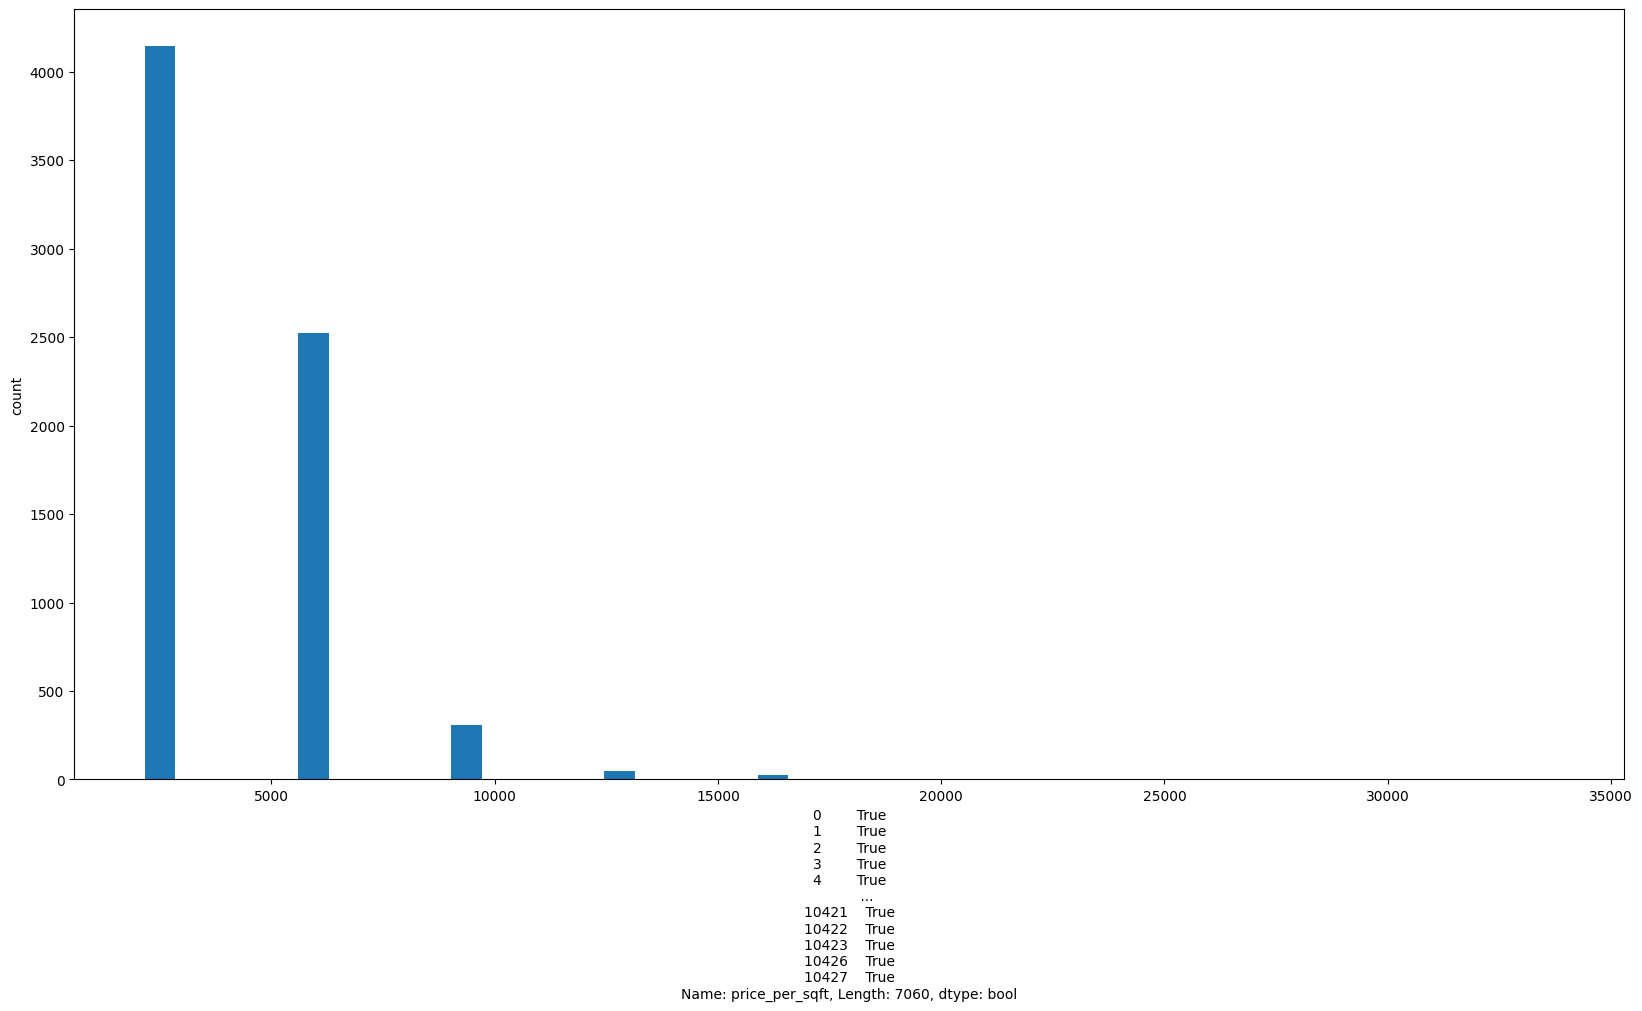

In [295]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.2)
plt.xlabel(df8.price_per_sqft<100000)
plt.ylabel('count')

In [296]:
len(df8[df8.bath>6])

6

In [297]:
df8.bath.unique()

array([4., 3., 2., 5., 1., 7., 6., 8.])

In [298]:
df8=df8[df8.bath<=6]

In [299]:
df8.drop(df8[df8.bath>6].index,inplace=True)

<ipython-input-299-516f5ed5e993>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8.drop(df8[df8.bath>6].index,inplace=True)


In [300]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,4798.211571,4.0,428.0,4,8919.990159
1,1st Block Jayanagar,3 BHK,2279.469792,3.0,194.0,3,8510.751084
2,1st Block Jayanagar,4 Bedroom,4798.211571,4.0,450.0,4,9378.494327
3,1st Block Jayanagar,3 BHK,2279.469792,2.0,130.0,3,5703.080623
4,1st Block Jayanagar,2 BHK,1649.397614,2.0,148.0,2,8972.972846


In [301]:
df8.drop(df8[df8.bath>df8.bhk+2].index,inplace=True)

In [302]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [303]:
df8.shape

(7053, 7)

In [304]:
import pandas as pd

##onr hot encoding on Location column

In [305]:
location_dummies=pd.get_dummies(df8.location)

In [306]:
df10=pd.concat([df8,location_dummies.drop('other',axis='columns')],axis='columns')

In [307]:
df10.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,4798.211571,4.0,428.0,4,8919.990159,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,3 BHK,2279.469792,3.0,194.0,3,8510.751084,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,4 Bedroom,4798.211571,4.0,450.0,4,9378.494327,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,3 BHK,2279.469792,2.0,130.0,3,5703.080623,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,2 BHK,1649.397614,2.0,148.0,2,8972.972846,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [308]:
df10.shape

(7053, 251)

In [309]:
df10.drop('location',axis='columns',inplace=True)

In [310]:
df10=df10.drop('size',axis='columns')

In [311]:
df10.head()

,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vidyaranyapura,Vijayanagar,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4798.211571,4.0,428.0,4,8919.990159,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2279.469792,3.0,194.0,3,8510.751084,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4798.211571,4.0,450.0,4,9378.494327,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2279.469792,2.0,130.0,3,5703.080623,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1649.397614,2.0,148.0,2,8972.972846,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##Train, Test split

In [312]:
x=df10.drop('price',axis='columns')

In [313]:
y=df10.price

In [314]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [315]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)


0.9217357216571593

##K -Fold cross validation

In [316]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.89059662, 0.90154869, 0.92623305, 0.90273968, 0.94151005])

## Grid Search CV

In [317]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Example: Assuming you have features in 'X' and target in 'y'
# X = df.drop('price', axis=1)  # Features
# y = df['price']                # Target variable



# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Initialize the model
model = LinearRegression()

# Define the parameter grid for Grid Search
param_grid = {
    'fit_intercept': [True, False]
}

# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

# Fit the model using Grid Search
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Best parameters found by Grid Search
print("Best Parameters:", grid_search.best_params_)

# Predict on the test set using the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Best Parameters:", best_params)
print("Best Cross-Validation Score (MSE):", -best_score)  # Negate to convert back to positive MSE
print("Mean Squared Error on Test Set:", mse)

# Return model, best score, and best parameters
result = {
    'model': best_model,
    'best_score': -best_score,  # Convert back to positive
    'best_parameters': best_params
}


Best Parameters: {'fit_intercept': True}
Mean Squared Error: 564.4459015145338
Best Parameters: {'fit_intercept': True}
Best Cross-Validation Score (MSE): 600.9676168347062
Mean Squared Error on Test Set: 564.4459015145338


In [321]:
x.columns

Index(['total_sqft', 'bath', 'bhk', 'price_per_sqft', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar',
       ...
       'Vidyaranyapura', 'Vijayanagar', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=248)

In [325]:
x.head()

,total_sqft,bath,bhk,price_per_sqft,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4798.211571,4.0,4,8919.990159,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2279.469792,3.0,3,8510.751084,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4798.211571,4.0,4,9378.494327,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2279.469792,2.0,3,5703.080623,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1649.397614,2.0,2,8972.972846,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [326]:
np.where(x.columns=='1st Phase JP Nagar')[0][0]

6

In [327]:
def predict_price(location,sqft,bath,bhk):
  global x  # Add this line to indicate you want to use the global 'x'
  loc_index=np.where(x.columns==location)[0][0]

  x_input=np.zeros(len(x.columns)) # Changed variable name to avoid conflict
  x_input[0]=sqft
  x_input[1]=bath
  x_input[2]=bhk
  if loc_index>=0:
    x_input[loc_index]=1
  return lr_clf.predict([x_input])[0] # Use x_input for prediction